In [118]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

In [134]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format='retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [135]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

from cross_entropy import test_grad

In [136]:
with open("optimize_data/line_search_data.pkl", "rb") as log_file:
    log = pickle.load(log_file)

In [137]:
def plot_metric(log, method, xaxis, offset=0):
    plt.figure(figsize=(12, 10))
    
    for line_search in log[method]:
        line_search_log = log[method][line_search]
        info = line_search_log.get_log()
        
        error = np.log(line_search_log.error)[offset:]
        if xaxis == "num_iter":
            metric = np.arange(error.shape[0])
        else:
            metric = info[xaxis][offset:]
            
        plt.plot(metric, error, label=f"{line_search}: {round(info['entropy'][-1],6)}")
        
    plt.xlabel(xaxis)
    plt.ylabel("log $|F(w^*) - F(w)|$")
    plt.legend()

# Problem statement

$ F_{train}(w)= -\frac{1}{N} y^{\mathsf{T}} \log (\sigma(Xw)) + (\mathbb{1}_{n} - y^{\mathsf{T}}) \log (\mathbb{1}_{n}-\sigma(Xw)) $, where $\sigma(z) = \frac{e^{z}}{1 + e^{z}} $ 

$\nabla F_{train}(w) = \frac{1}{N} (\sigma(Xw) - y)^{\mathsf{T}}X$

$\nabla^{2} F_{train}(w) = \frac{1}{N} X^{\mathsf{T}} D_{n} X$, where $D_{n} = Diag(\sigma(Xw)(\mathbb{1}_{n} - \sigma(Xw)))$

$w^* = \underset{w \in \mathbb{R}^{m}}{\arg \min}\ F_{train}(w)$

## Gradient & Hessian numerical check

In [144]:
test_grad(sample_size=1000, n_iters=1000)

Mean maximum relative error (n=1000, iterations=1000)
--------------------------------
gradient:  4.5295301891061764e-11
hessian:  7.0018575615848e-05


# A1A dataset

## Gradient Descent

| line search   |   entropy |   num iter |   oracle calls |   time, s |
|---------------|-----------|------------|----------------|-----------|
| golden        |  0.298463 |      10000 |         240001 |     41.31 |
| brent         |  0.298267 |       5196 |          89963 |     16.02 |
| armijo        |  0.298267 |       6626 |          49919 |     10.21 |
| wolfe         |  0.298402 |      10000 |          69433 |     16.48 |
| lipschitz     |  0.298976 |      10000 |          30001 |      7.67 |

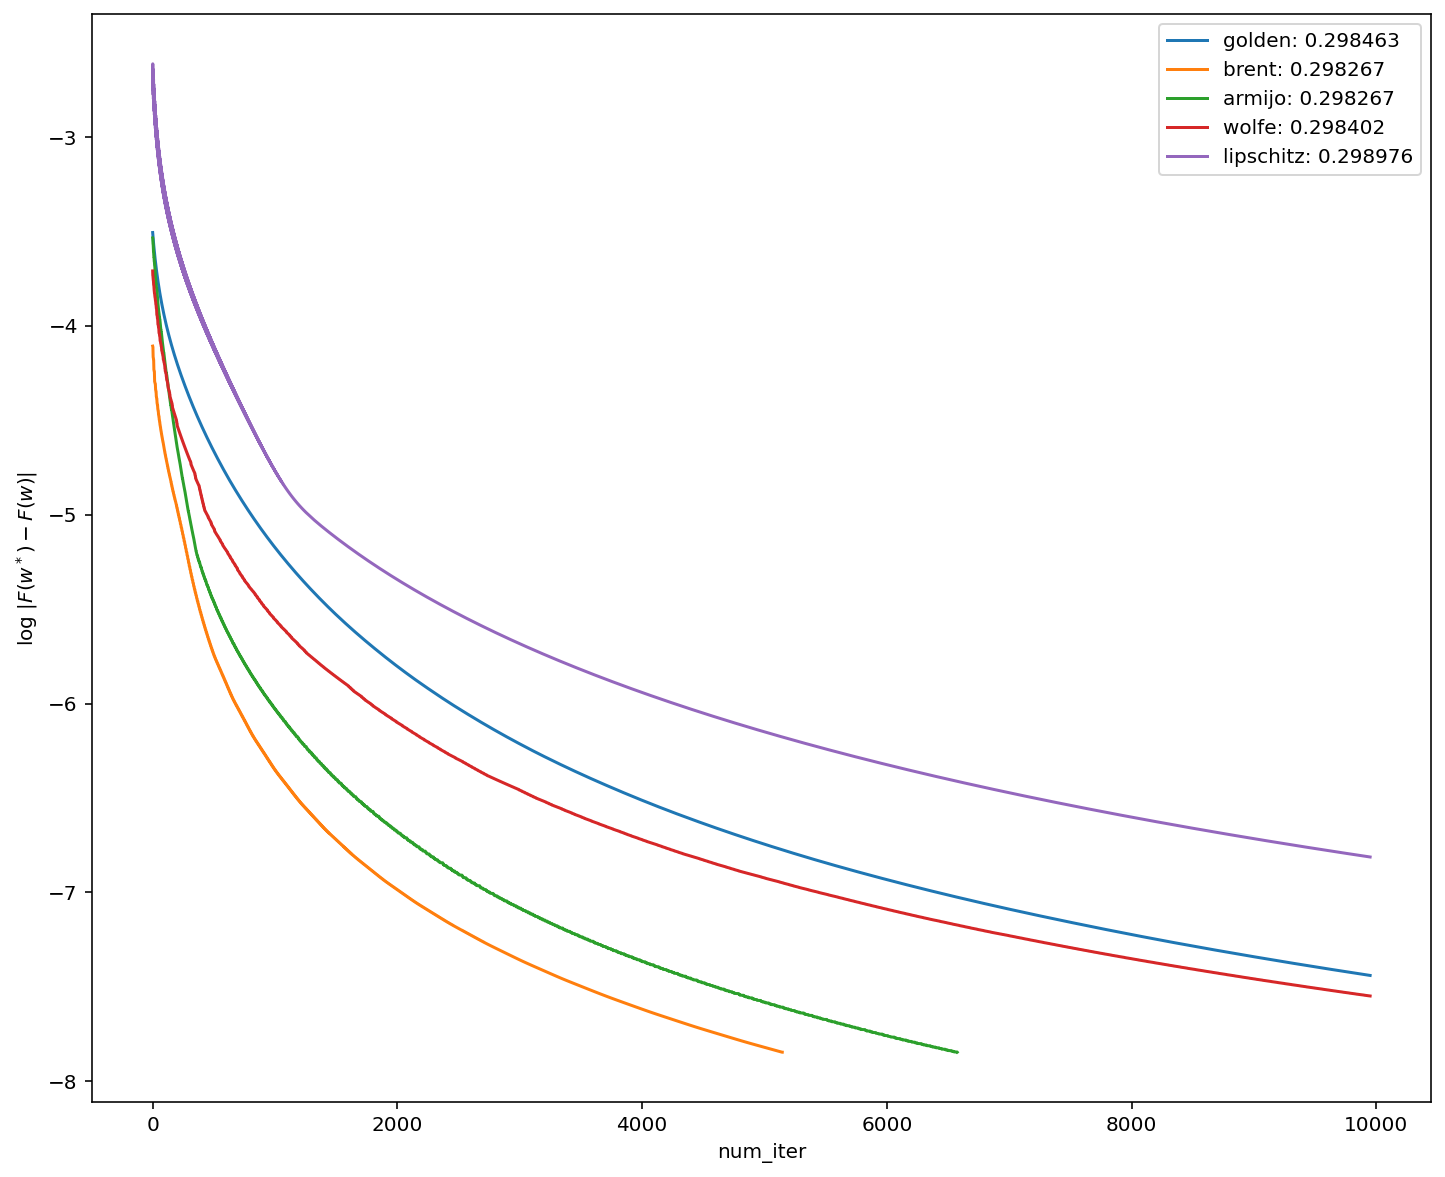

In [145]:
plot_metric(log["a1a"], "gradient descent", "num_iter", offset=50)

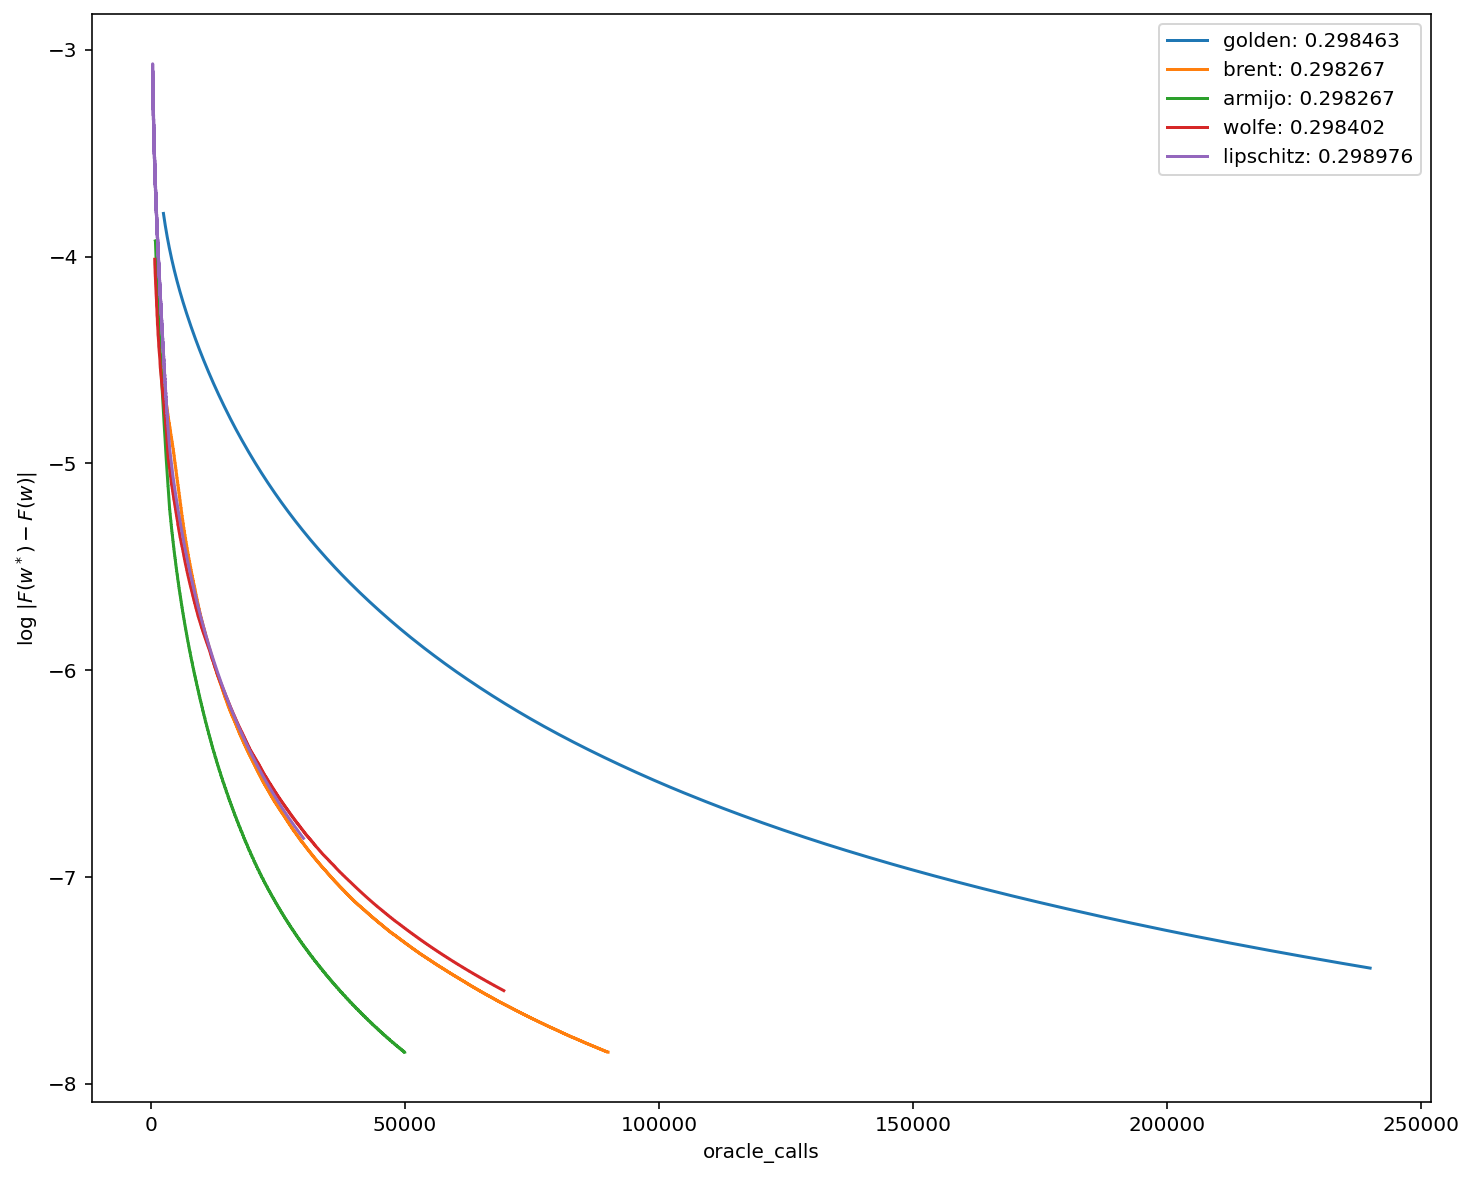

In [146]:
plot_metric(log["a1a"], "gradient descent", "oracle_calls", offset=100)

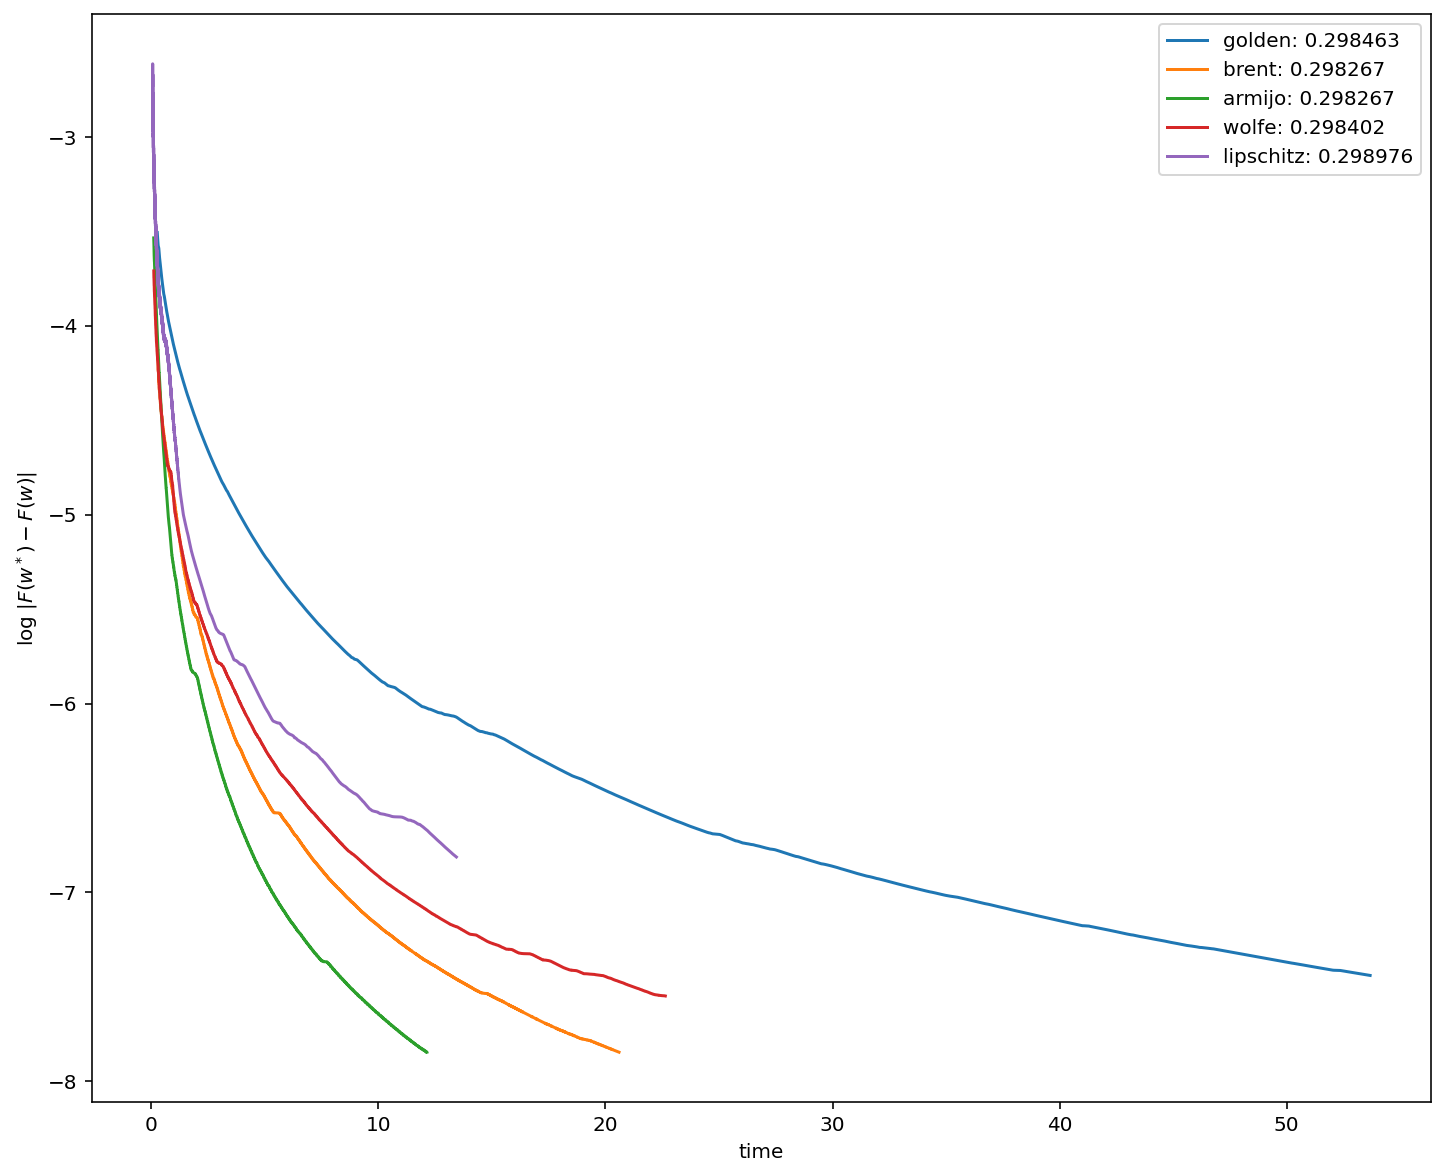

In [147]:
plot_metric(log["a1a"], "gradient descent", "time", offset=50)

## Newton

| line search   |   entropy |   num iter |   oracle calls |   time, s |
|---------------|-----------|------------|----------------|-----------|
| golden        |  0.297875 |         11 |            265 |      0.08 |
| brent         |  0.297875 |          9 |            101 |      0.05 |
| armijo        |  0.297875 |         10 |             80 |      0.05 |
| wolfe         |  0.297876 |         11 |            178 |      0.08 |

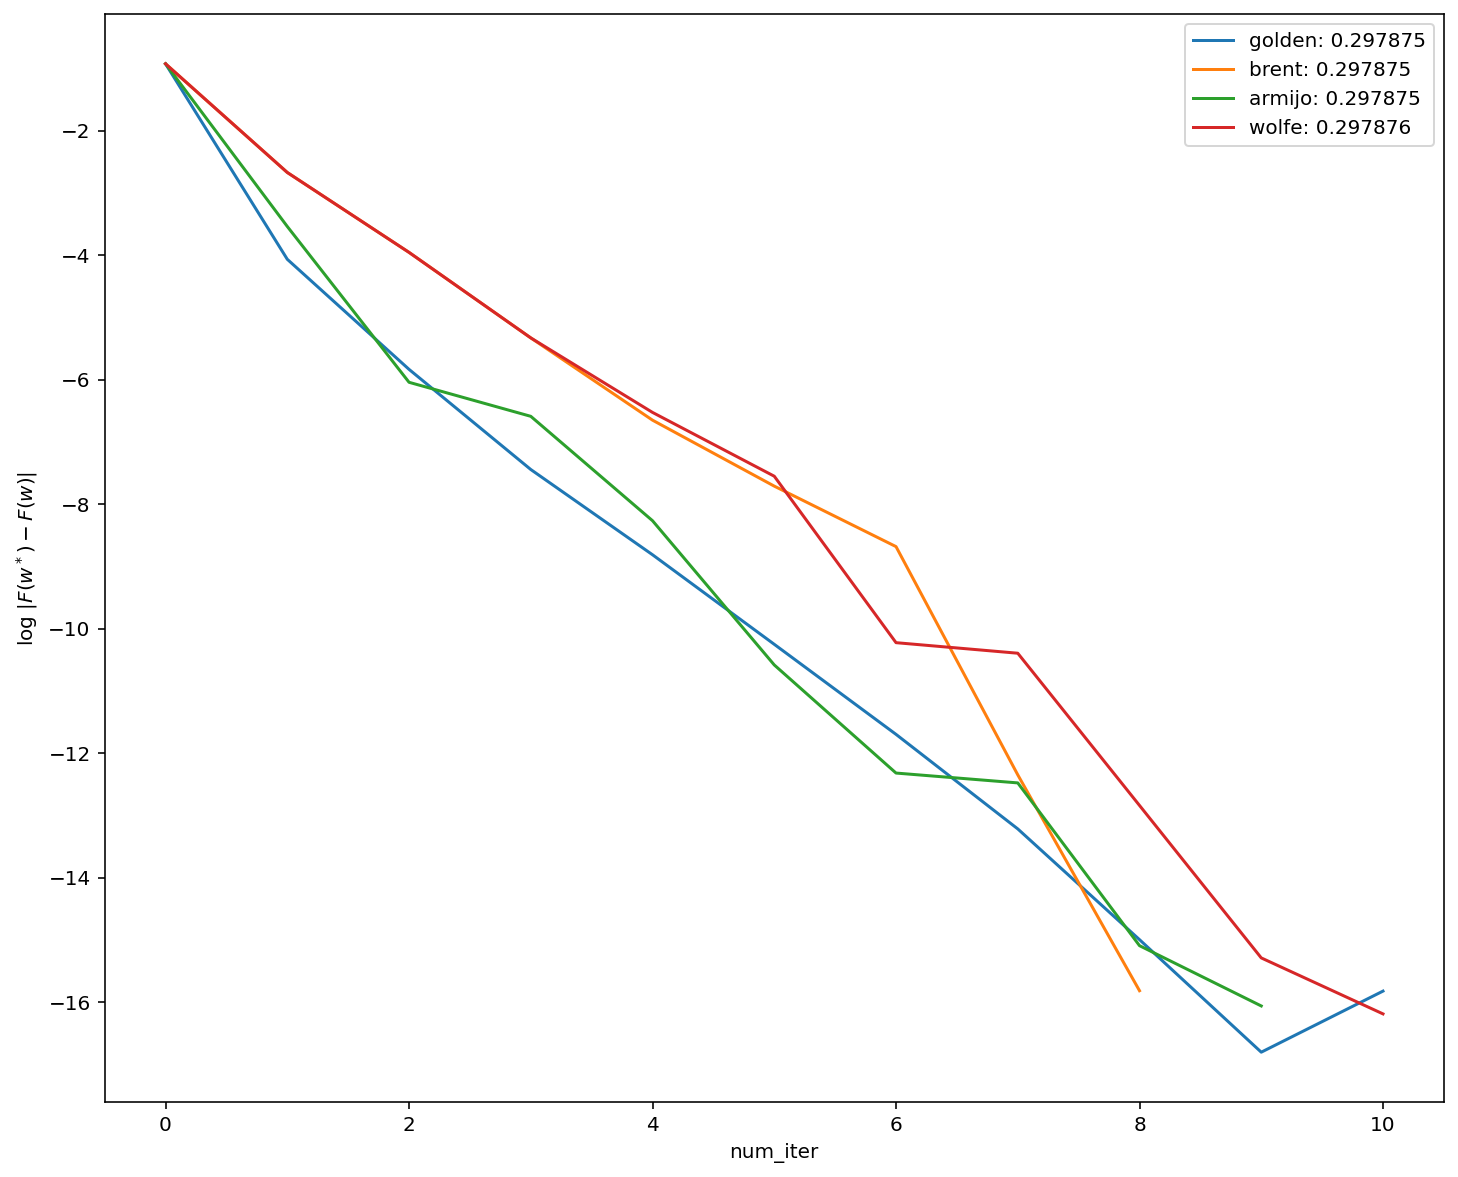

In [148]:
plot_metric(log["a1a"], "newton", "num_iter")

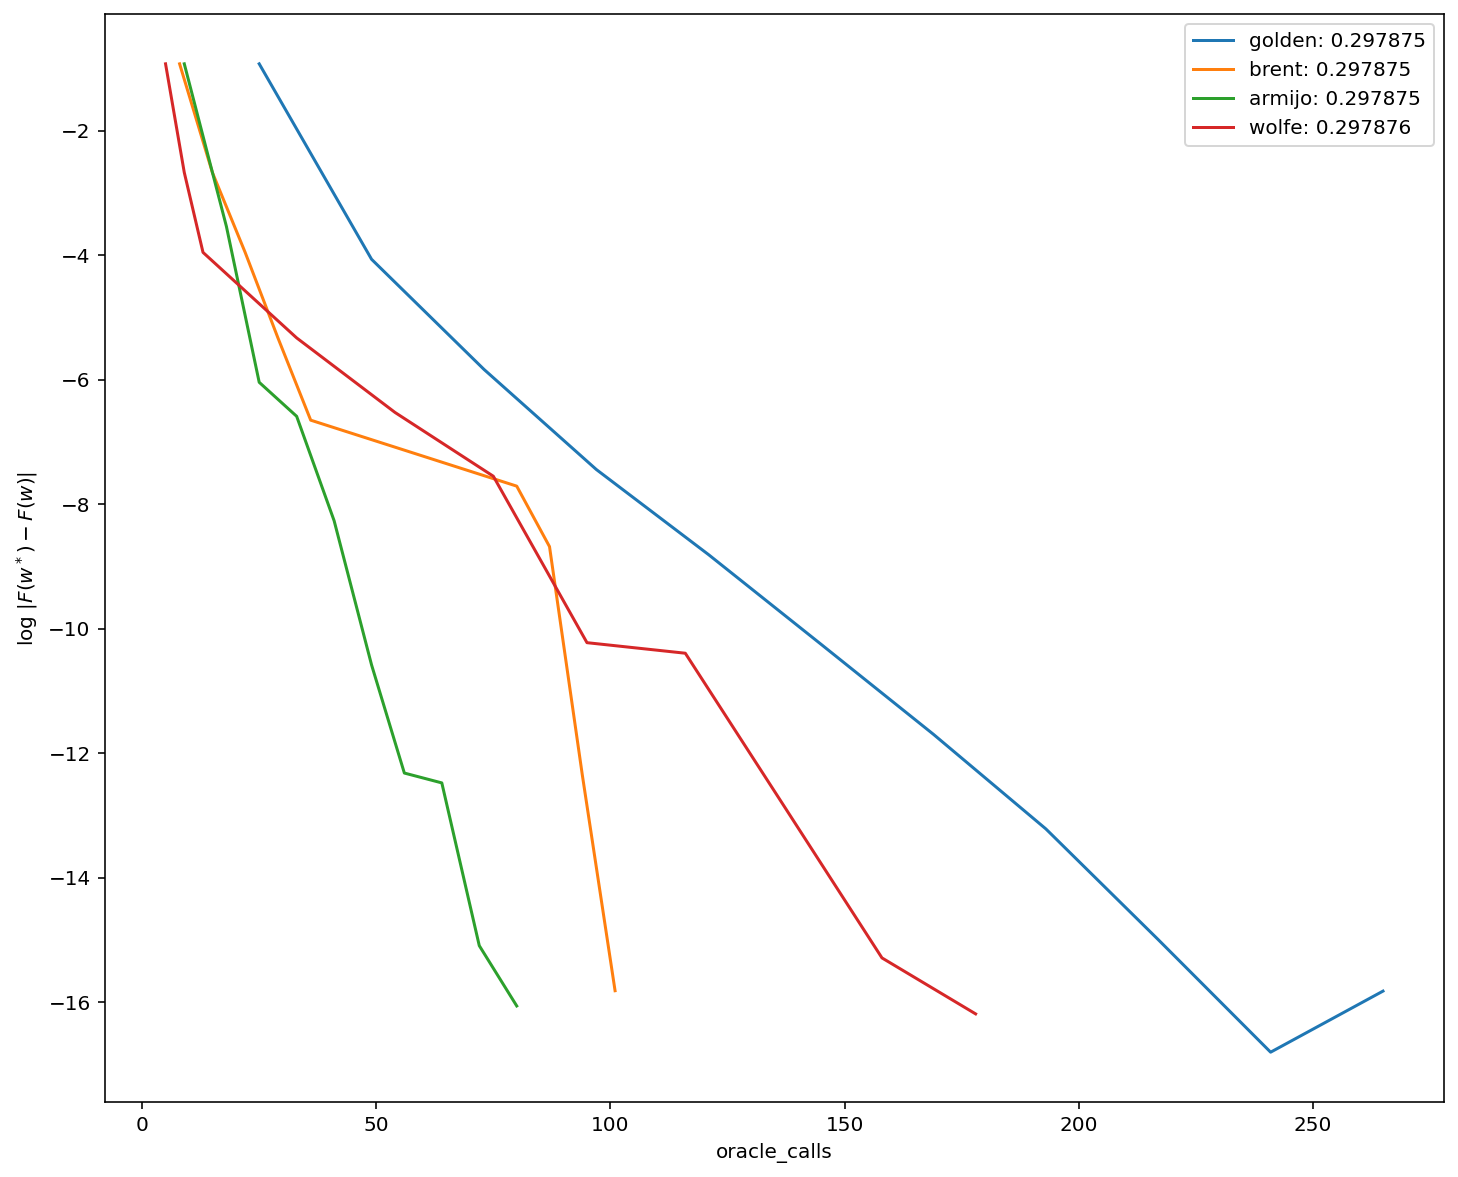

In [149]:
plot_metric(log["a1a"], "newton", "oracle_calls")

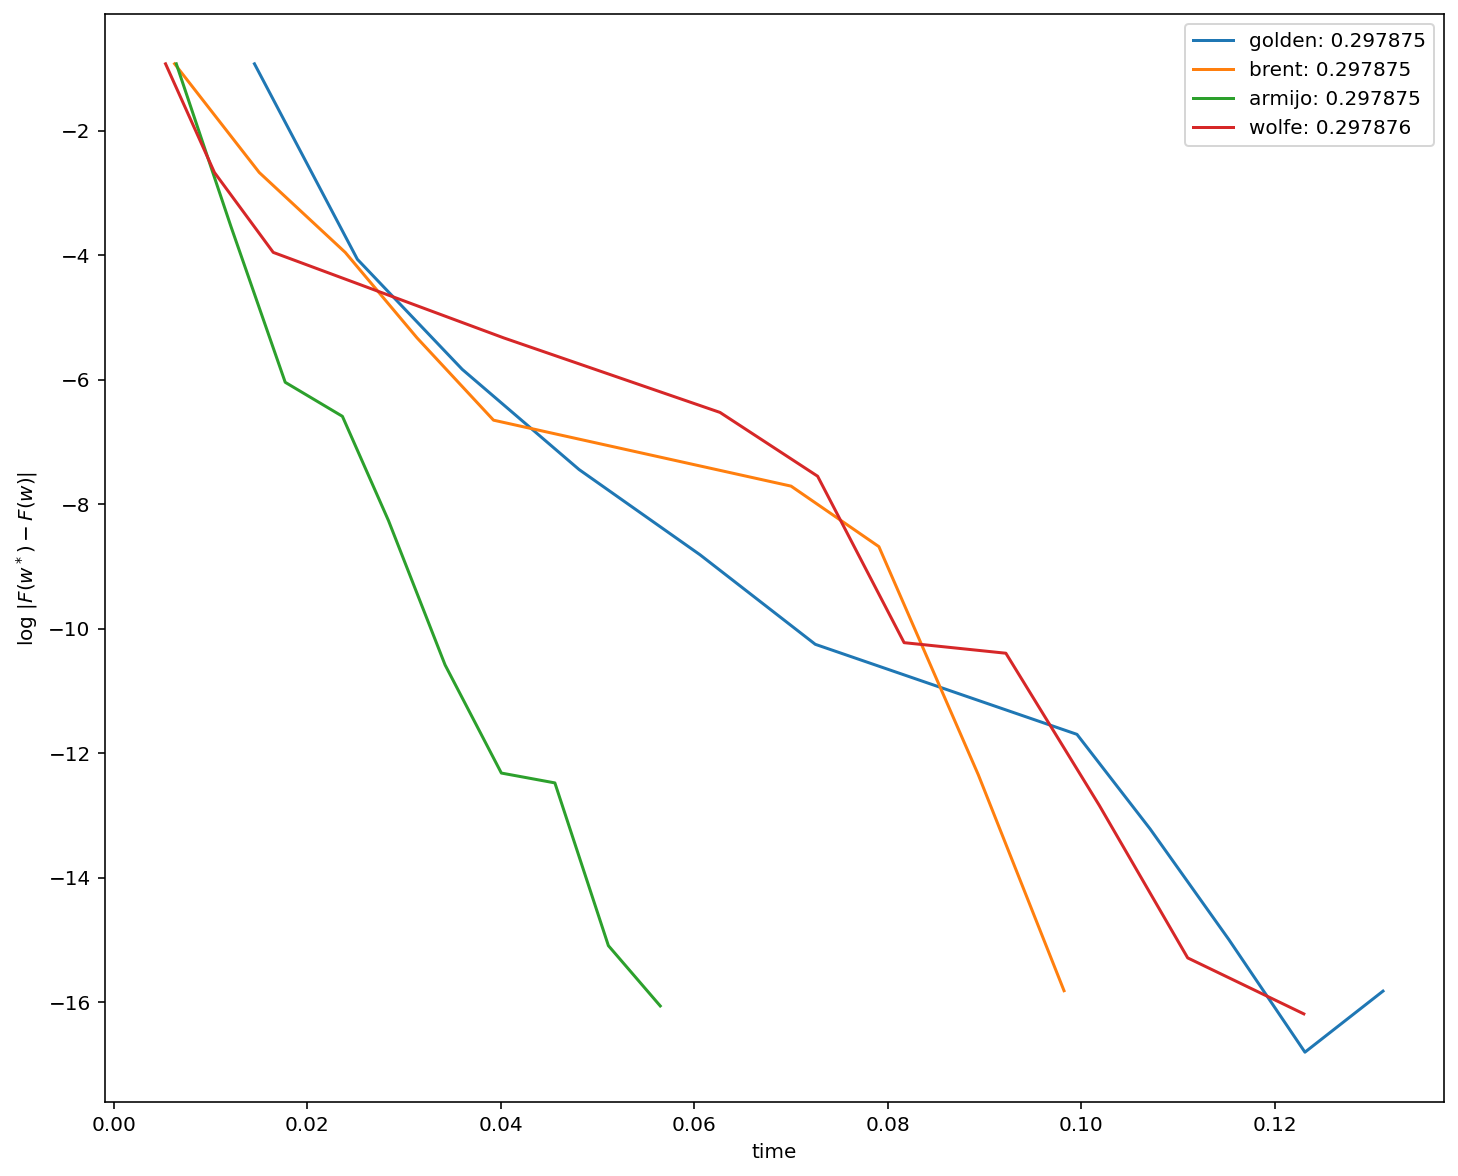

In [150]:
plot_metric(log["a1a"], "newton", "time")

## Hessian-Free Newton

| line search   |   entropy |   num iter |   oracle calls |   time, s |
|---------------|-----------|------------|----------------|-----------|
| golden        |  0.297879 |         10 |           2848 |      0.49 |
| brent         |  0.297876 |         10 |           4036 |      0.7  |
| armijo        |  0.297877 |         15 |           2153 |      0.38 |
| wolfe         |  0.297876 |         12 |           4847 |      0.85 |

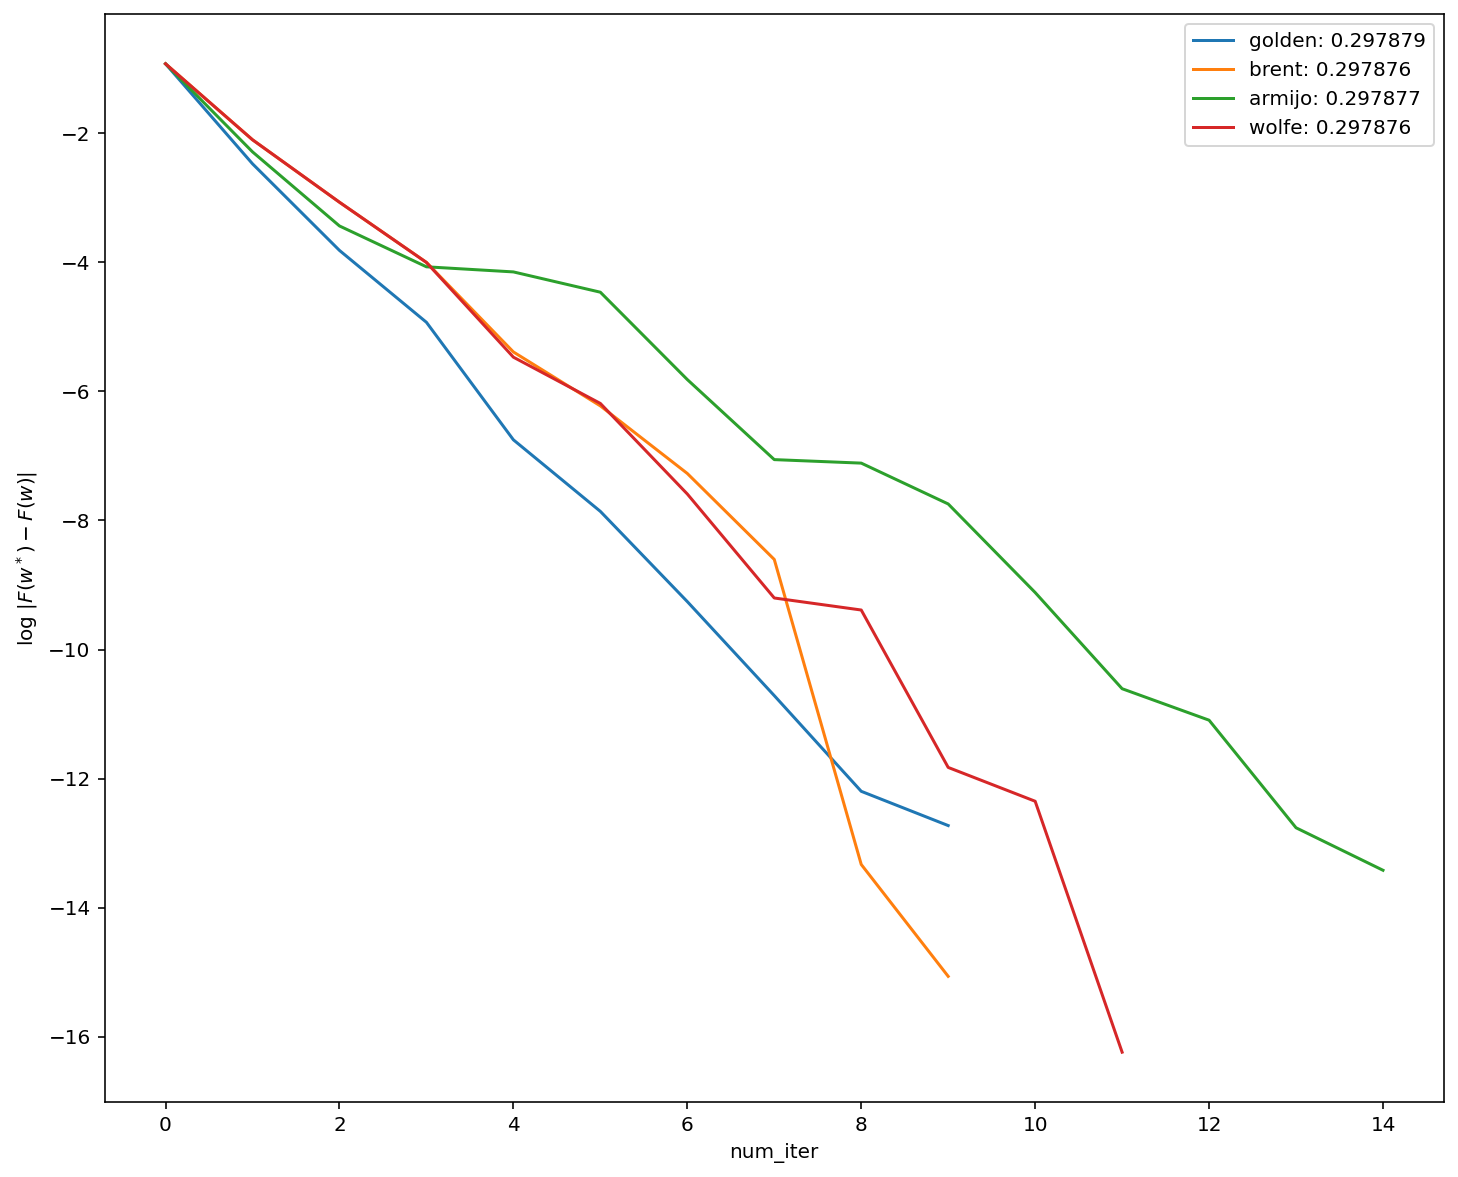

In [151]:
plot_metric(log["a1a"], "hf_newton", "num_iter")

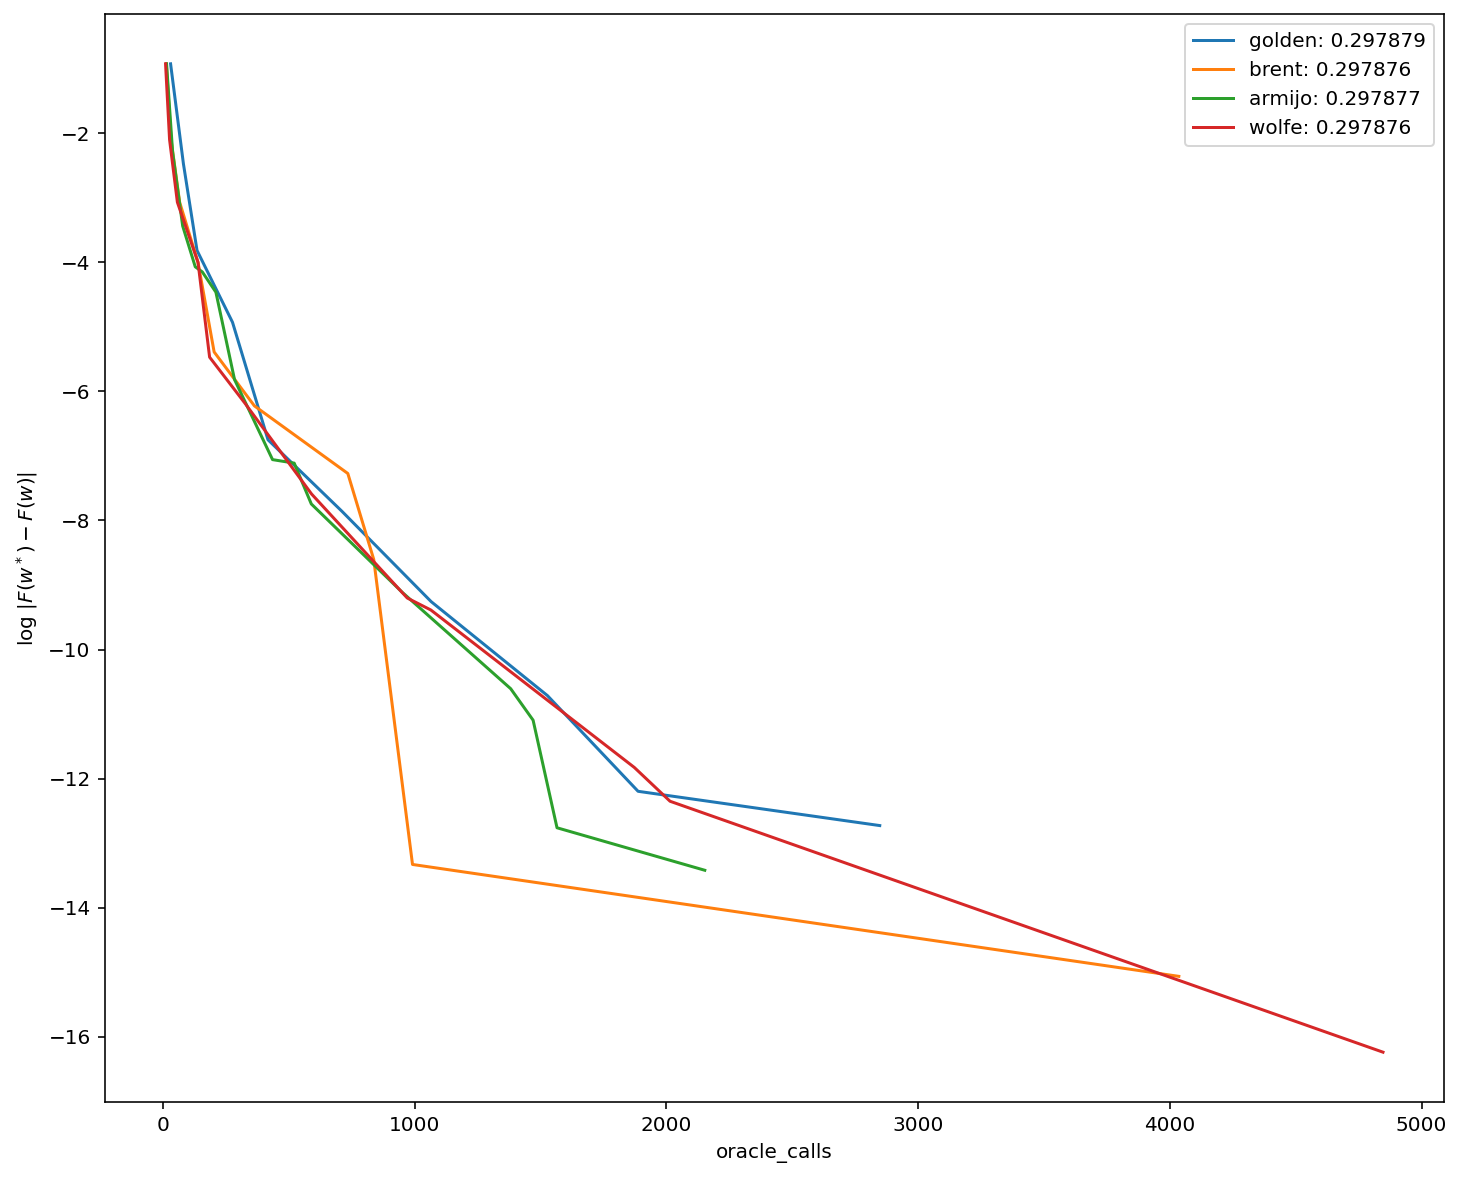

In [152]:
plot_metric(log["a1a"], "hf_newton", "oracle_calls")

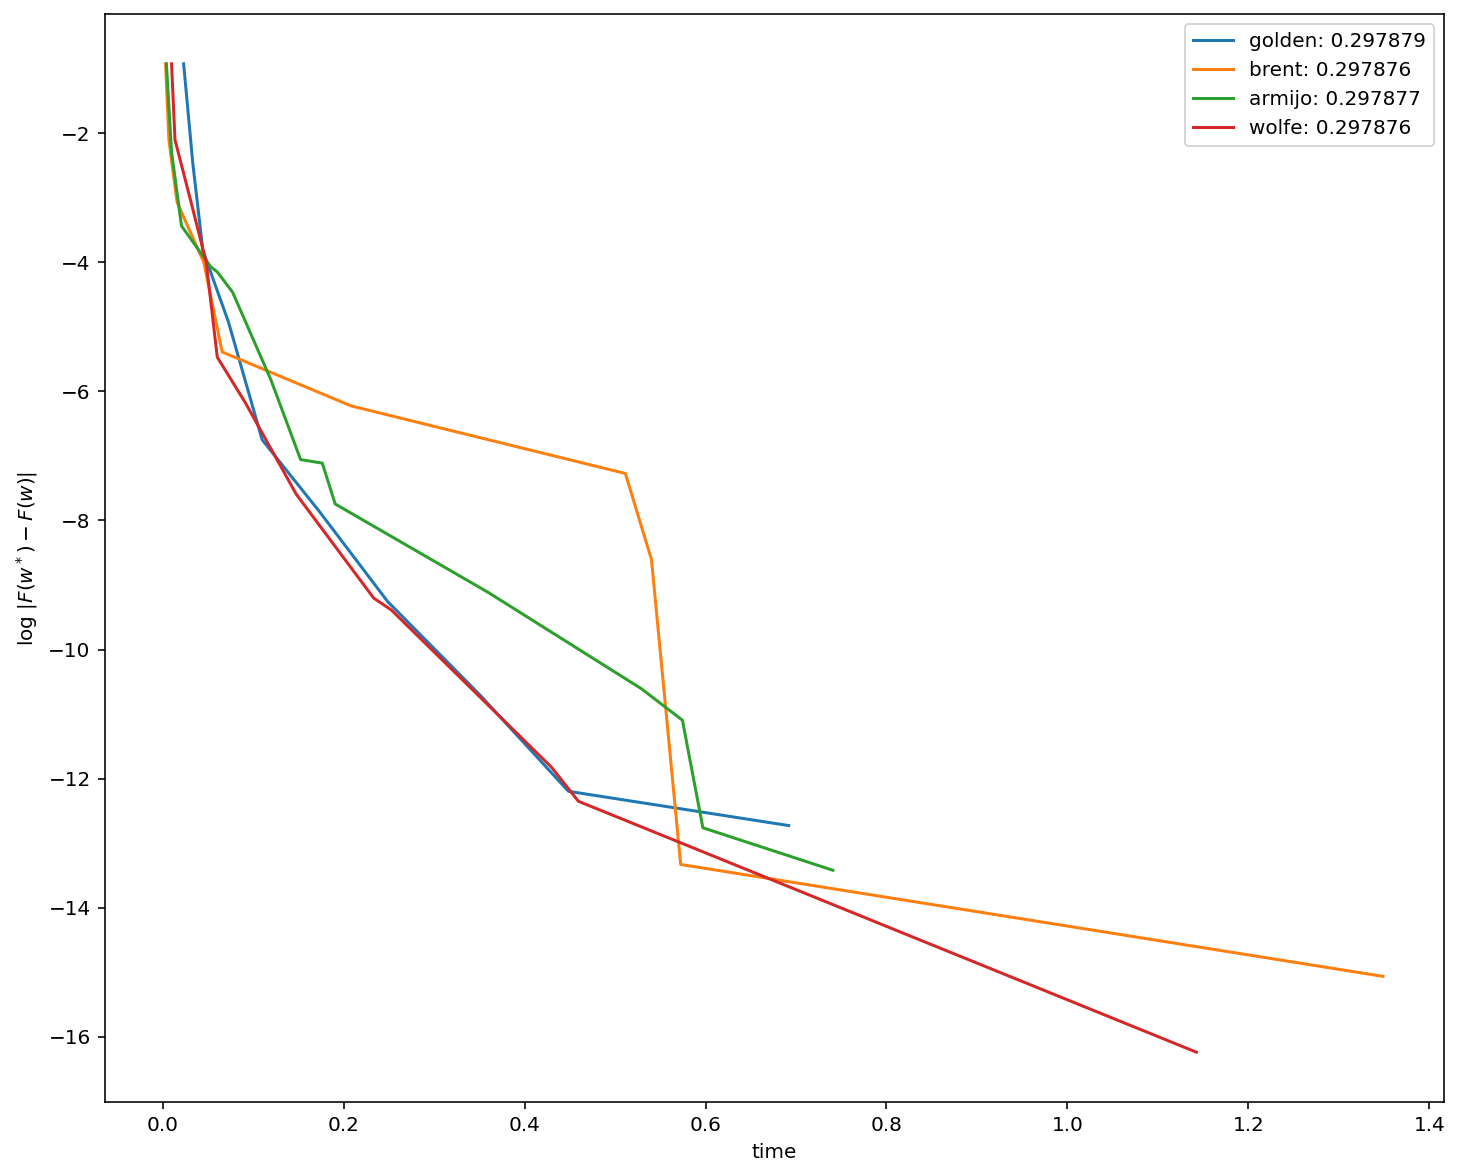

In [153]:
plot_metric(log["a1a"], "hf_newton", "time")